In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv(r"C:\Users\sageo\OneDrive\Desktop\Projects\Projects\insurance2.csv",index_col=0)

In [3]:
df

,sex,bmi,children,smoker,region,charges,insuranceclaim
age,,,,,,,
19,0,27.900,0,1,3,16884.92400,1
18,1,33.770,1,0,2,1725.55230,1
28,1,33.000,3,0,2,4449.46200,0
33,1,22.705,0,0,1,21984.47061,0
32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...
50,1,30.970,3,0,1,10600.54830,0
18,0,31.920,0,0,0,2205.98080,1
18,0,36.850,0,0,2,1629.83350,1


In [4]:
df.describe()

,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 19 to 61
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1338 non-null   int64  
 1   bmi             1338 non-null   float64
 2   children        1338 non-null   int64  
 3   smoker          1338 non-null   int64  
 4   region          1338 non-null   int64  
 5   charges         1338 non-null   float64
 6   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [6]:
correlation_matrix = df.corr()
correlation_matrix

,sex,bmi,children,smoker,region,charges,insuranceclaim
sex,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


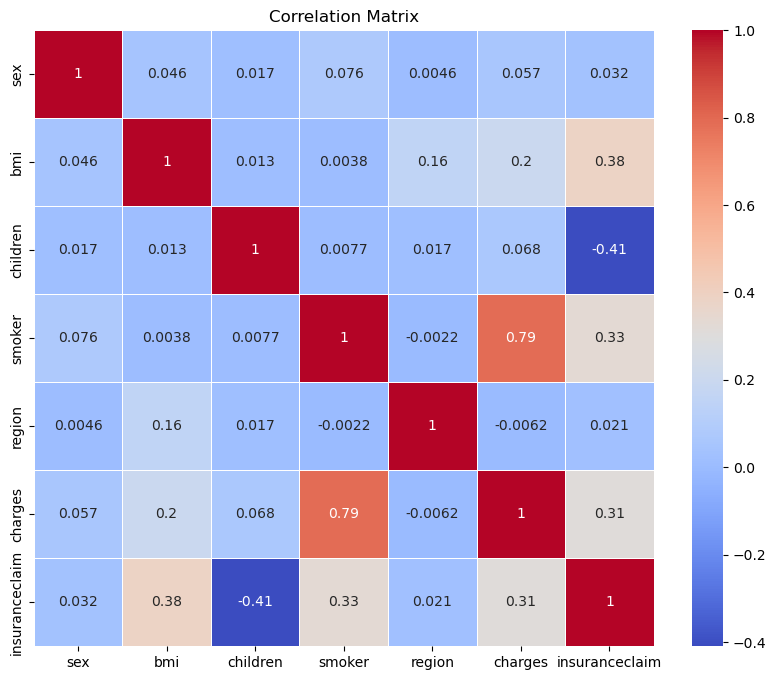

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

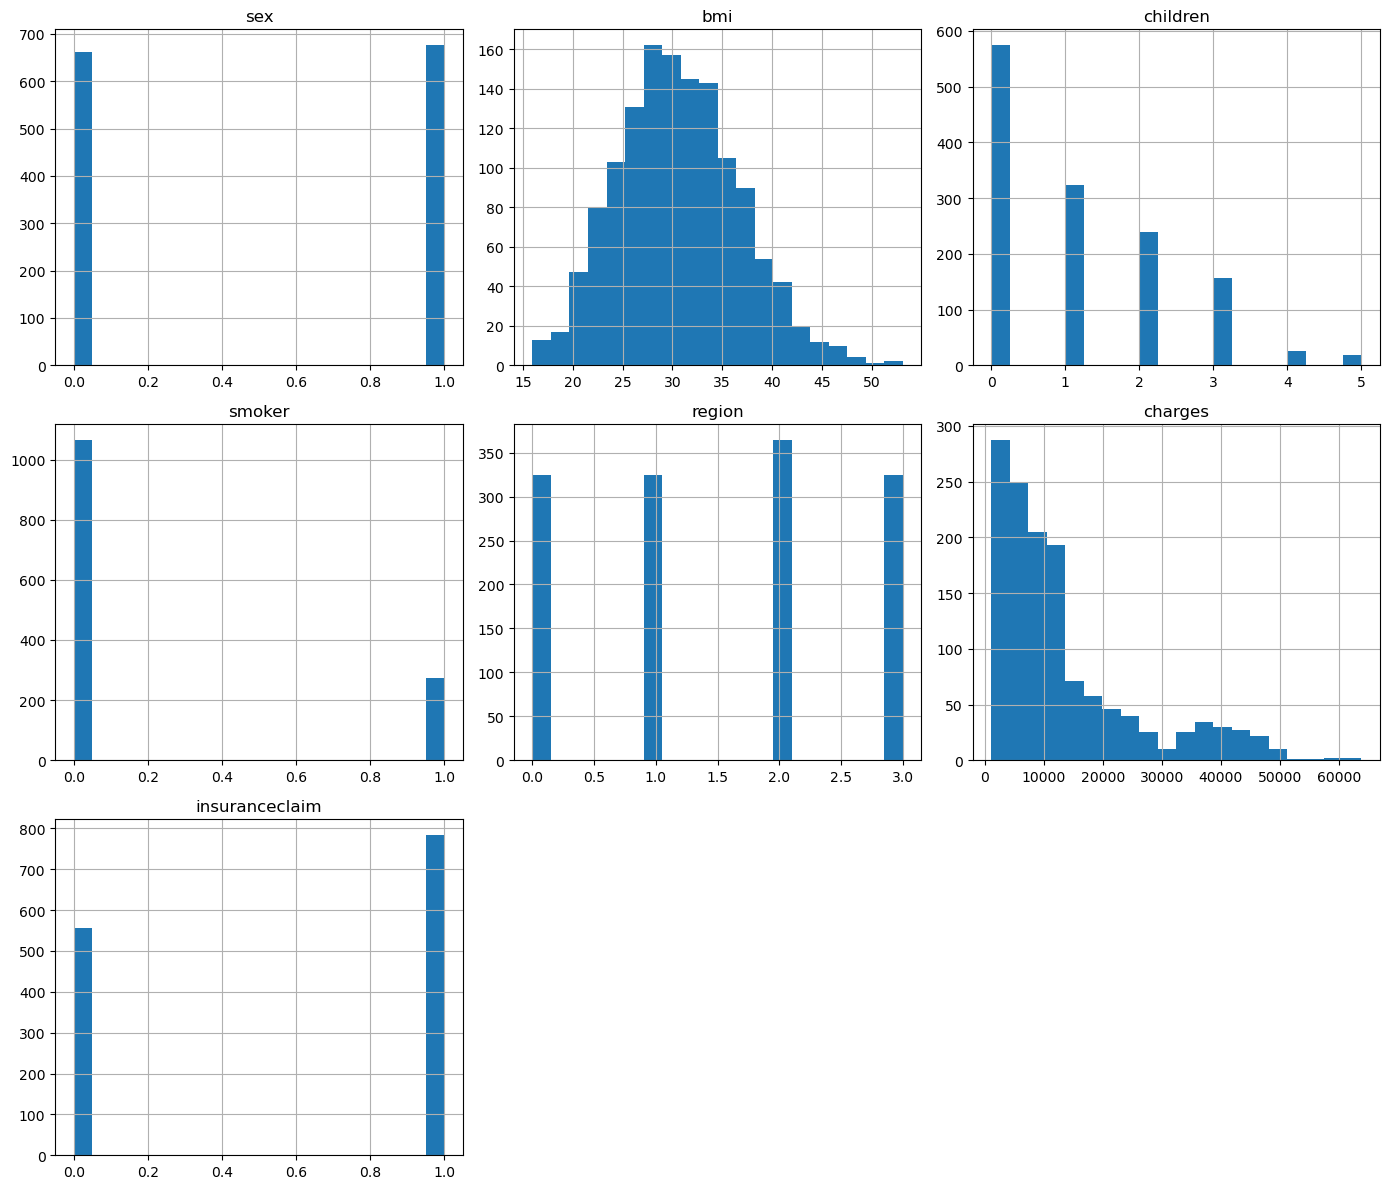

In [8]:
df.hist(bins=20, figsize=(14, 12), layout=(3, 3))
plt.tight_layout()
plt.show()

# Model Building 

In [9]:
# Split data into features and target
X = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [10]:
# Scale numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on test data
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.90
Precision: 0.93
Recall: 0.90
F1 Score: 0.92
ROC-AUC Score: 0.92
Confusion Matrix:
[[144  17]
 [ 23 218]]


# Model Performance Metrics

# Confusion Matrix 